# Student Performance Indicator

## Life cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data pre-processing
- Model Training
- Choose best model

## 1) Problem Statement

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethinicity, Parental level of Education, Lunch and Test preparation course.

## 2) Data Collection 

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download
- The data consists of 8 columns and 1000 rows.

## 2.1 Import Required Packages

### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

## Import the CSV Data as Pandas DataFrame

In [ ]:
df=pd.read_csv('stud.csv')

### Show Top 5 Records

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the Dataset 

In [ ]:
df.shape

(1000, 8)

## 2.2 Dataset Information

- gender: sex of students -> (Male/Female)
- race/ethnicity: ethnicity of students -> (Group A, B, C, D, E)
- parental level of education: parents final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch: having lunch before test (standard or free/reduced)
- test preparation course: complete or not complete before test
- math score
- reading score
- writing score

## 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statisics of data set
- Check various categories present in the different categorical column

## 3.1 Check Missing Values 

In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight

- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum score is much higher = 10 and for reading much higher = 17 

## Exploring Data

In [ ]:
print("Categories in gender variable:    ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:    ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:    ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:    ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:    ",end='')
print(df['test preparation course'].unique())

Categories in gender variable:     [0 1]
Categories in 'race/ethnicity' variable:     [1 2 0 3 4]
Categories in 'parental level of education' variable:     [2 4 1 3 5 6]
Categories in 'lunch' variable:     [0 1]
Categories in 'test preparation course' variable:    [0 1]


In [ ]:
## define numerical and categorical columns

numerical_features = [feature for feature in df.columns if df[feature].dtype != "O" ]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

# print columns
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## Adding columns for "Total Score" and "Average"

In [ ]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
reading_full = df[df['reading score'] == 100]['Average'].count()
writing_full = df[df['writing score'] == 100]['Average'].count()
math_score = df[df['math score'] == 100]['Average'].count()

print(f'Number of students with full Marks in Maths: {math_score}')
print(f'Number of students with full Marks in Writing: {writing_full}')
print(f'Number of students with full Marks in Reading: {reading_full}')

Number of students with full Marks in Maths: 7
Number of students with full Marks in Writing: 14
Number of students with full Marks in Reading: 17


In [ ]:
reading_less_20 = df[df['reading score'] <= 20]['Average'].count()
writing_less_20 = df[df['writing score'] <= 20]['Average'].count()
math_score_20 = df[df['math score'] <= 20]['Average'].count()

print(f'Number of students with less than 20 Marks in Maths: {math_score_20}')
print(f'Number of students with less than 20 Marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 Marks in Reading: {reading_less_20}')

Number of students with less than 20 Marks in Maths: 4
Number of students with less than 20 Marks in Writing: 3
Number of students with less than 20 Marks in Reading: 1


### Insights

- From above we get students have performed the worst in Maths
- Best Performance is in reading section

## Exploring Data (Visualization)

### Visualize average score distribution to make some conclusion

- Histogram
- Kernel Distribution Estimator (KDF)

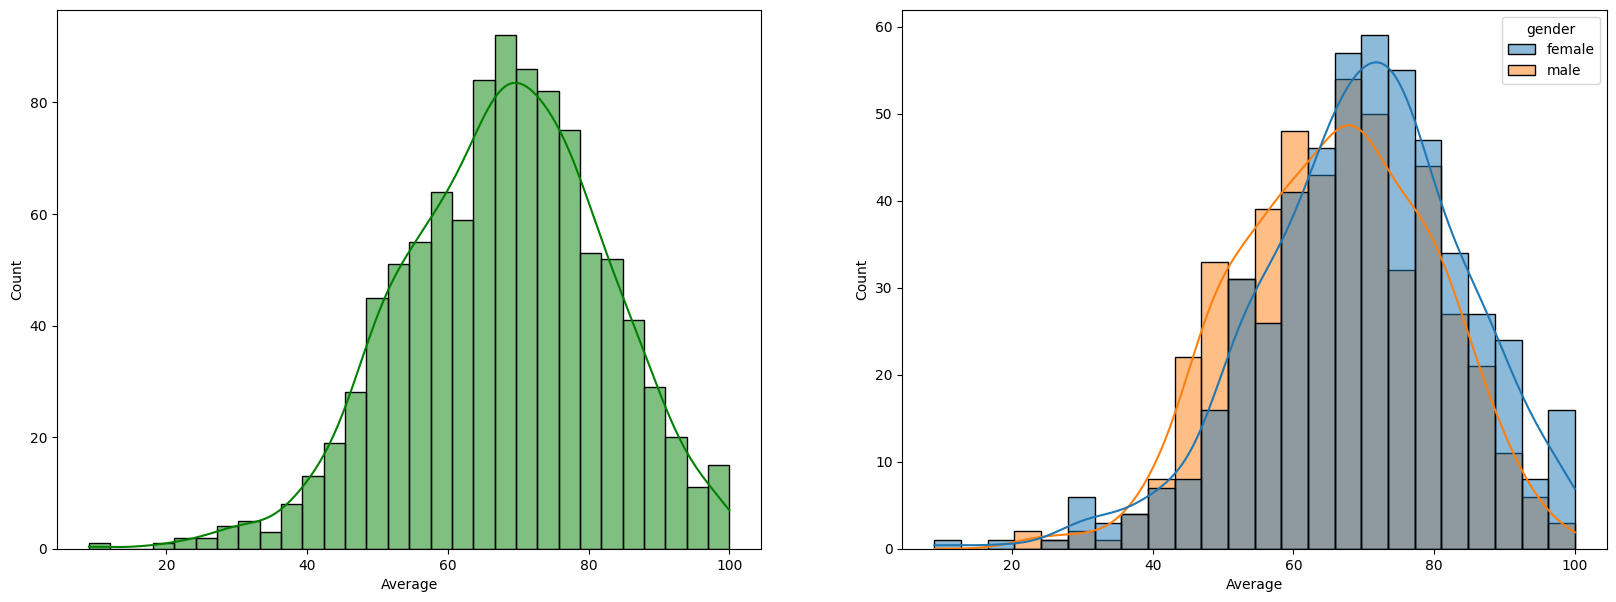

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=[20,7])
plt.subplot(1,2,1)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g')
plt.subplot(1,2,2)
sns.histplot(data=df, x='Average', kde=True, hue='gender')
plt.show()

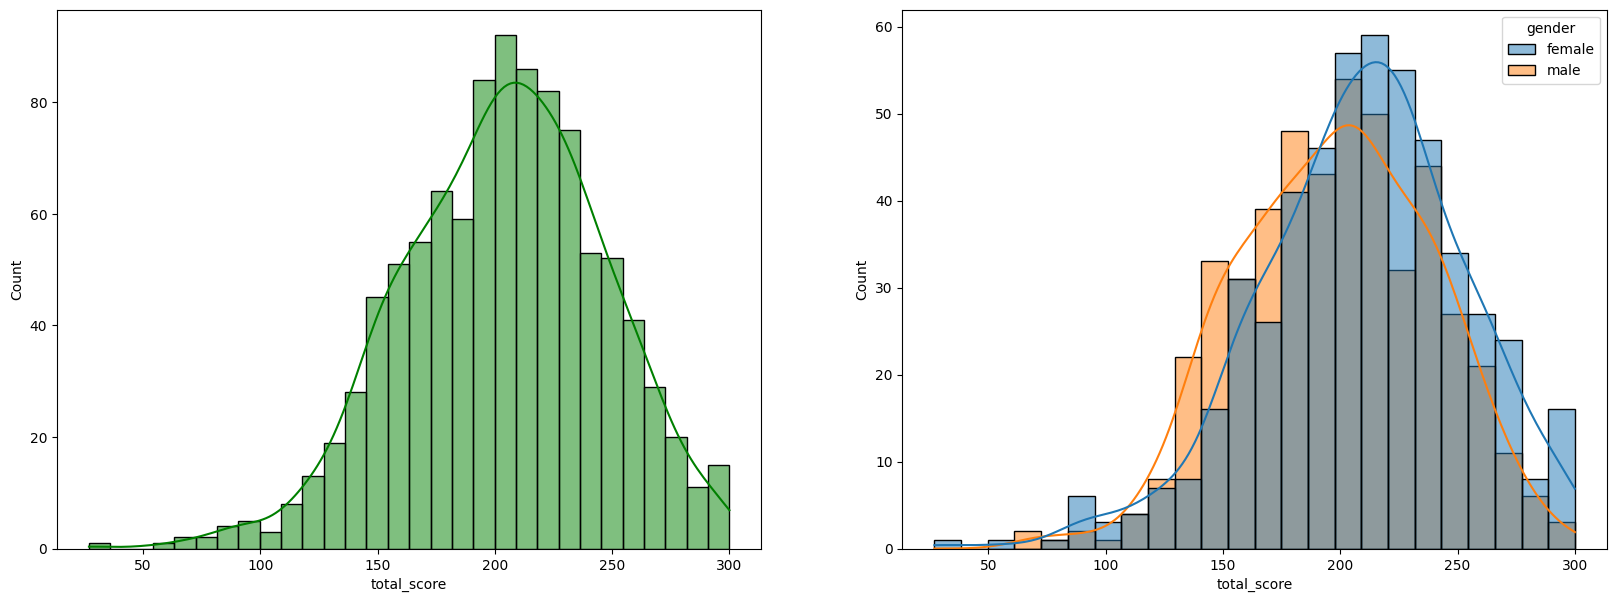

In [ ]:
plt.subplots(1, 2, figsize=[20,7])
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

### Insights

- Female students tend to score more than male students.

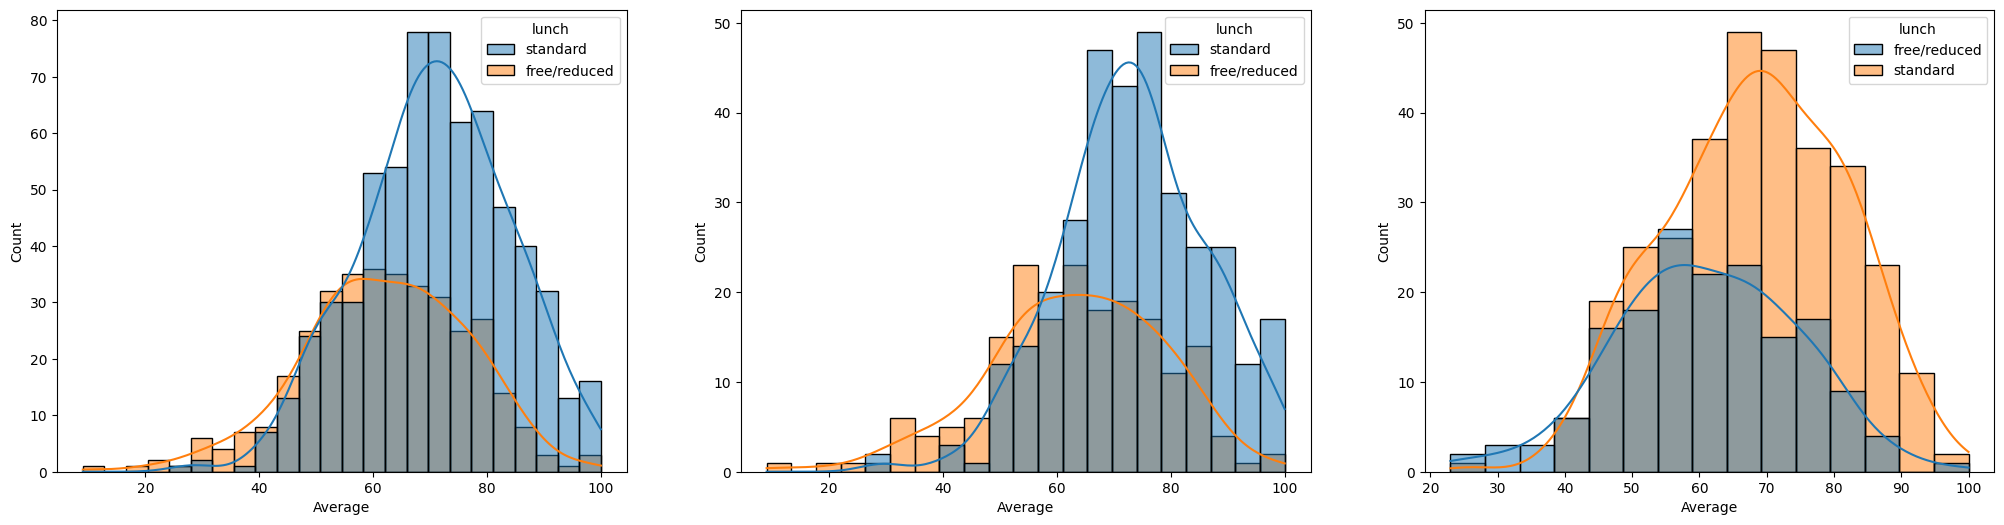

In [ ]:
plt.subplots(1, 3, figsize=[25, 6])
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Average', kde=True ,hue='lunch')
plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender == 'female'], x='Average', kde=True, hue='lunch')
plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender == 'male'], x='Average', kde=True, hue='lunch')
plt.show()

### Insights

- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it male or female. 

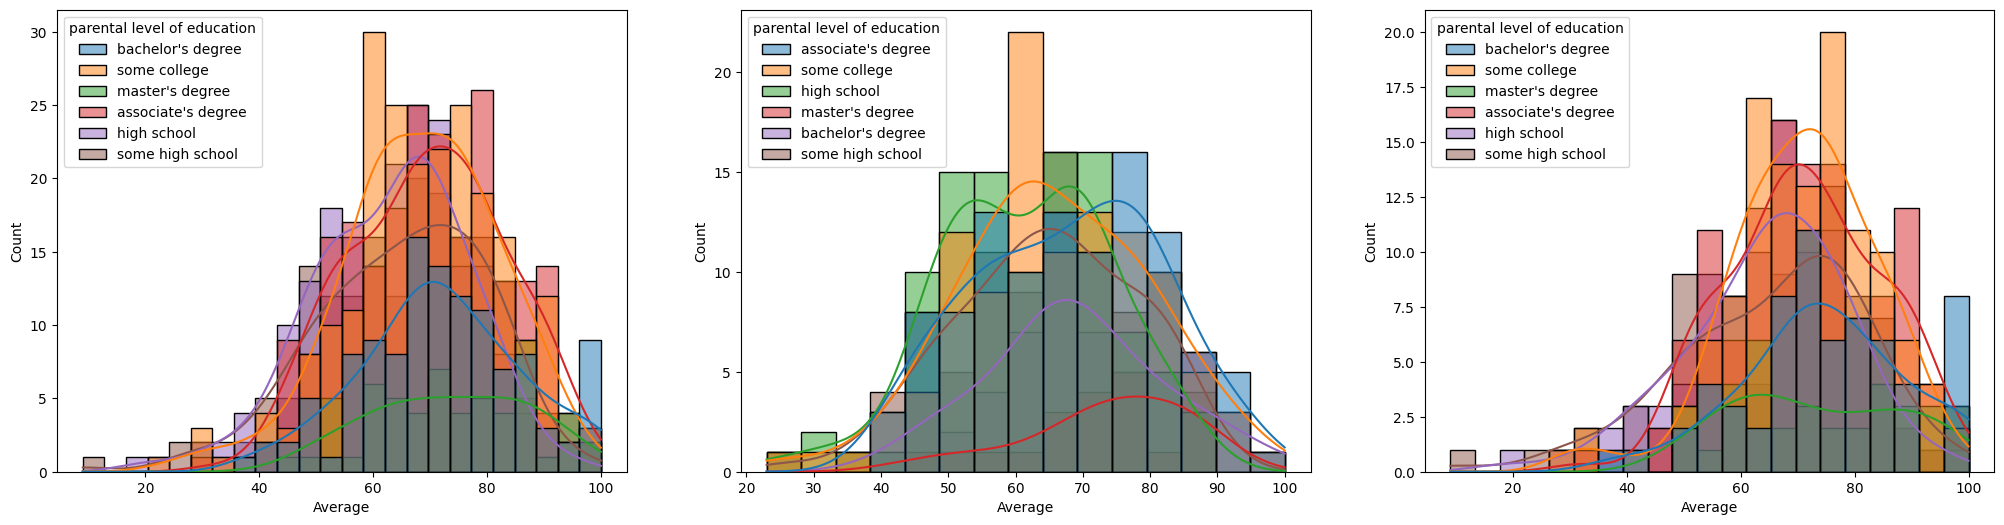

In [ ]:
plt.subplots(1, 3, figsize=[25, 6])
plt.subplot(1, 3, 1)
ax = sns.histplot(data=df, x='Average', kde=True, hue='parental level of education')
plt.subplot(1, 3, 2)
ax = sns.histplot(data=df[df.gender == 'male'], x='Average', kde=True, hue='parental level of education')
plt.subplot(1, 3, 3)
ax = sns.histplot(data=df[df.gender == 'female'], x='Average', kde=True, hue='parental level of education')
plt.show()

### Insights

- In general parent's education don't help students perform well in exams.
- 2nd plot shows that parents whose education is of associate's degree or masters' degree their male child tend to perform well in the exam.
- 3rd plot we can see there is no effect of parent's education on female students.

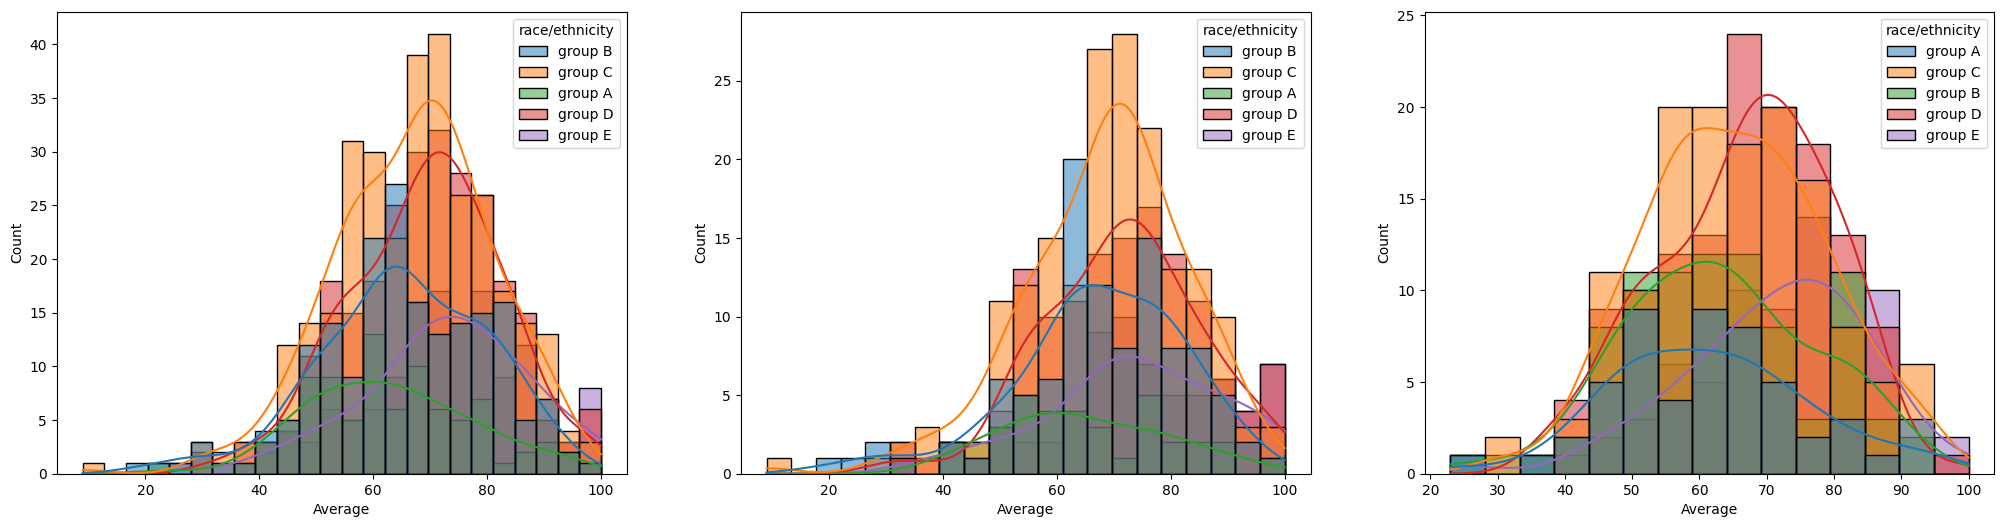

In [ ]:
plt.subplots(1, 3, figsize=[25,6])
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Average', kde=True, hue='race/ethnicity')
plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender == 'female'], x='Average', kde=True, hue='race/ethnicity')
plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender == 'male'], x='Average', kde=True, hue='race/ethnicity')
plt.show()

### Insights 

- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

### Maximum score of students in all the subjects

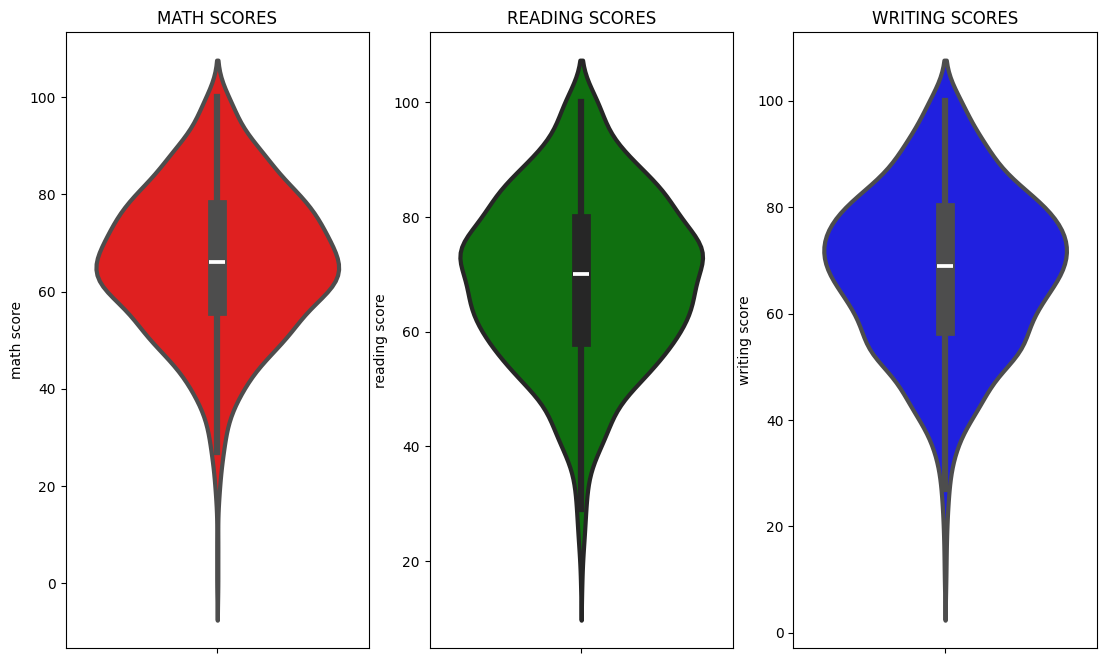

In [ ]:
plt.figure(figsize=[18,8])
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score', data=df, color='r', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score', data=df, color='g', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score', data=df, color='b', linewidth=3)
plt.show()

### Insights 

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### Mutivariate analysis using pieplot

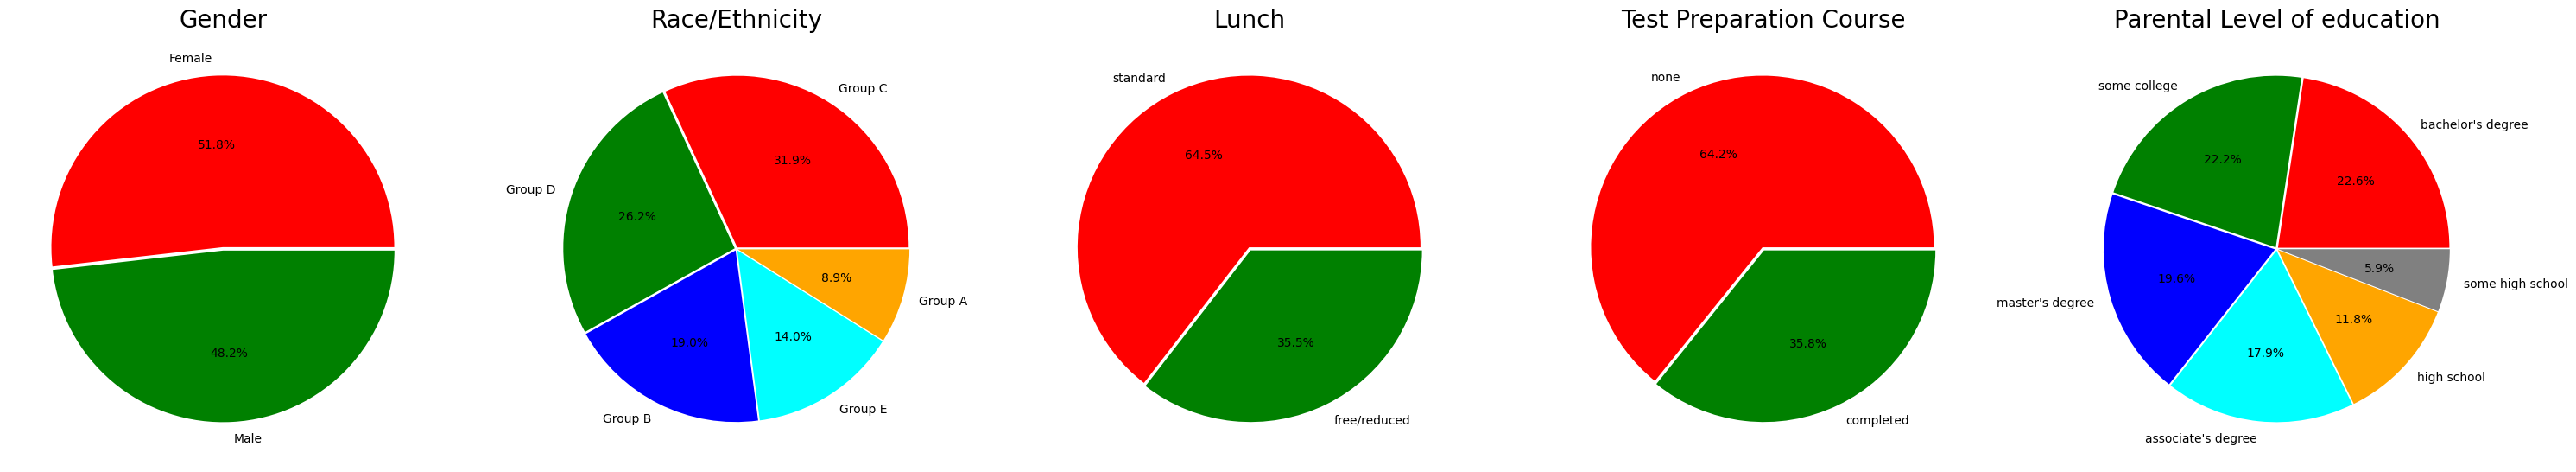

In [ ]:
# plt.rcParams.keys()

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
color = ['red', 'green']

plt.pie(size, labels=labels, colors=color, explode=(0.01, 0.01), autopct='%1.1f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = ['Group C','Group D','Group B','Group E','Group A']
color = ['red','green','blue','cyan','orange']

plt.pie(size, labels=labels, colors=color, explode=(0.01,0.01,0.01,0.01,0.01), autopct='%1.1f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 3)
size=df['lunch'].value_counts()
labels=['standard','free/reduced']
color=['red','green']

plt.pie(size, labels=labels, colors=color, explode=(0.01,0.01), autopct='%1.1f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 4)
size=df['test preparation course'].value_counts()
labels=['none','completed']
color=['red','green']

plt.pie(size, labels=labels, colors=color, explode=(0.01,0.01), autopct='%1.1f%%')
plt.title('Test Preparation Course', fontsize=20)
plt.axis('off')


plt.subplot(1,5,5)
size=df['parental level of education'].value_counts()
labels=["bachelor's degree",'some college',"master's degree","associate's degree",'high school','some high school']
color=['red','green','blue','cyan','orange','grey']

plt.pie(size, labels=labels, colors=color, explode=(0.01,0.01,0.01,0.01,0.01,0.01), autopct='%1.1f%%')
plt.title('Parental Level of education',fontsize=20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insights

- Number of Male and Female students is almost equal
- Number of students are greatest in Group C.
- number of students who have standard lunch are greater.
- number of students who have not enrolled in any test preparation is greater.
- Number of students whose parental education is "Some College" is greater followed by "Associate's Degree".

### Feature Wise Visualization

## GENDER COLUMN

- How is distribution of Gender?
- Is Gender has any impact on student's performance?

## UNIVARIATE ANALYSIS (How is distribution of Gender ?)

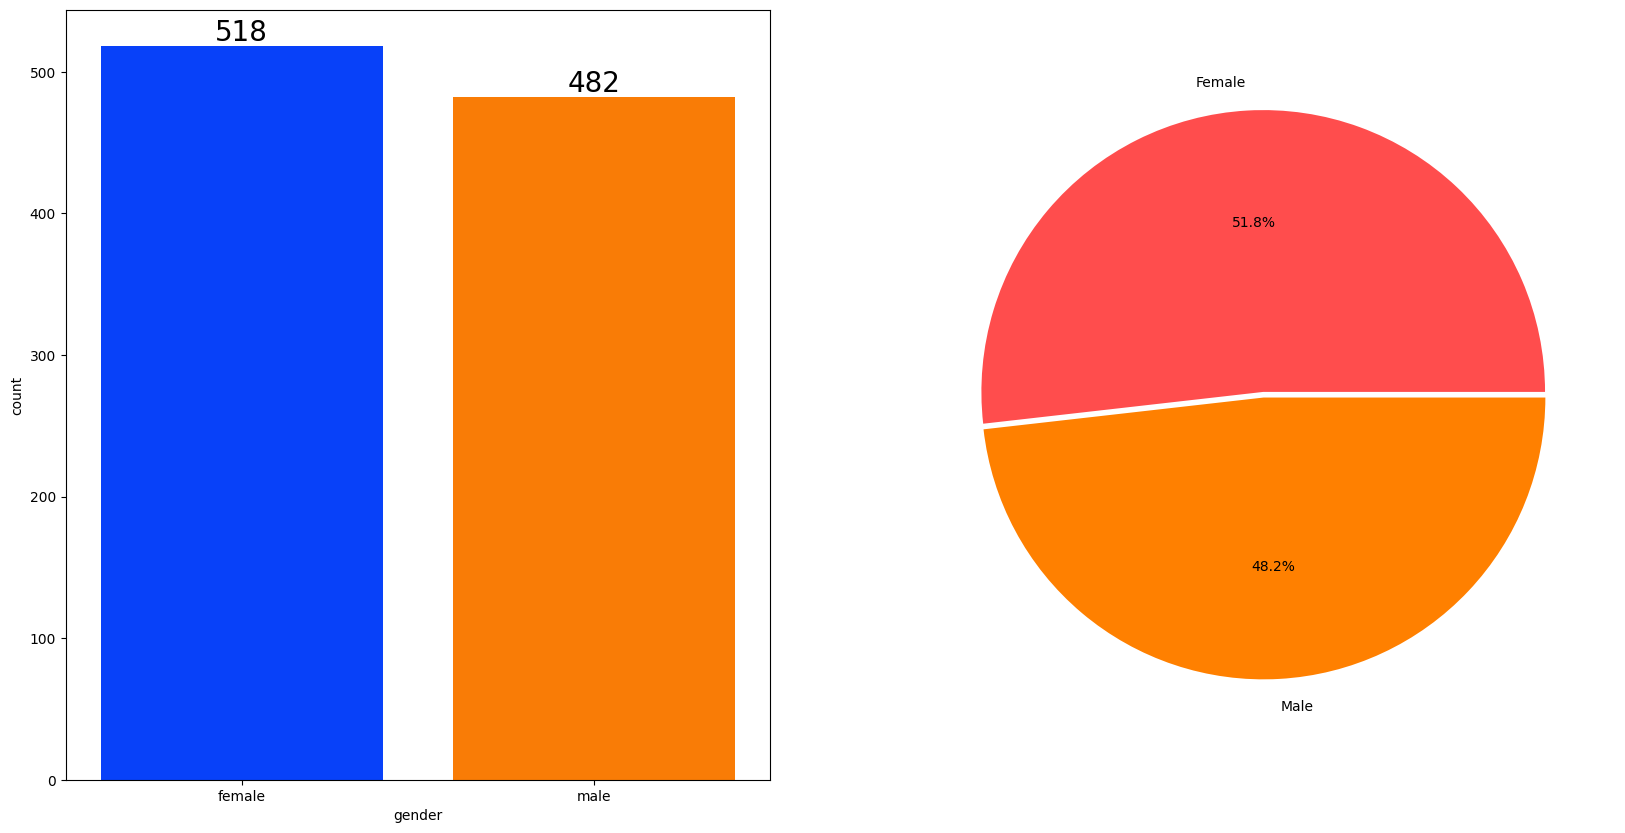

In [ ]:
f, ax= plt.subplots(1, 2, figsize=[20,10])
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=(0.01,0.01),autopct='%1.1f%%',colors=['#ff4d4d','#ff8000'])
plt.show()

### Insights

- Gender has balanced data with Female students are 518 (51.8%) and male students are 482 (48.2%)

### BIVARIATE ANALYSIS (Is gender has any impact on student's performance?)

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
gender_map = {'female':0, 'male':1}
race_ethnicity_map = {"group A":0, "group B":1, "group C":2, "group D":3, "group E":4}
parental_level_of_education_map  = {"master's degree":1,"bachelor's degree":2,"associate's degree":3,"some college":4,"high school":5,"some high school":6}
lunch_map = {"standard":0, "free/reduced":1}
test_preparation_course_map = {"none":0, "completed":1}

df['gender'] = df['gender'].map(gender_map)
df['race/ethnicity'] = df['race/ethnicity'].map(race_ethnicity_map)
df['parental level of education'] = df['parental level of education'].map(parental_level_of_education_map)
df['lunch'] = df['lunch'].map(lunch_map)
df['test preparation course'] = df['test preparation course'].map(test_preparation_course_map)

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Average
0,0,1,2,0,0,72,72,74,218,72.666667
1,0,2,4,0,1,69,90,88,247,82.333333
2,0,1,1,0,0,90,95,93,278,92.666667
3,1,0,3,1,0,47,57,44,148,49.333333
4,1,2,4,0,0,76,78,75,229,76.333333


In [ ]:
gender_group = df.groupby(by='gender').mean()
gender_group

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Average
gender,,,,,,,,,
0,2.175676,3.857143,0.364865,0.355212,63.633205,72.608108,72.467181,208.708494,69.569498
1,2.172199,3.985477,0.344398,0.360996,68.728216,65.473029,63.311203,197.512448,65.837483


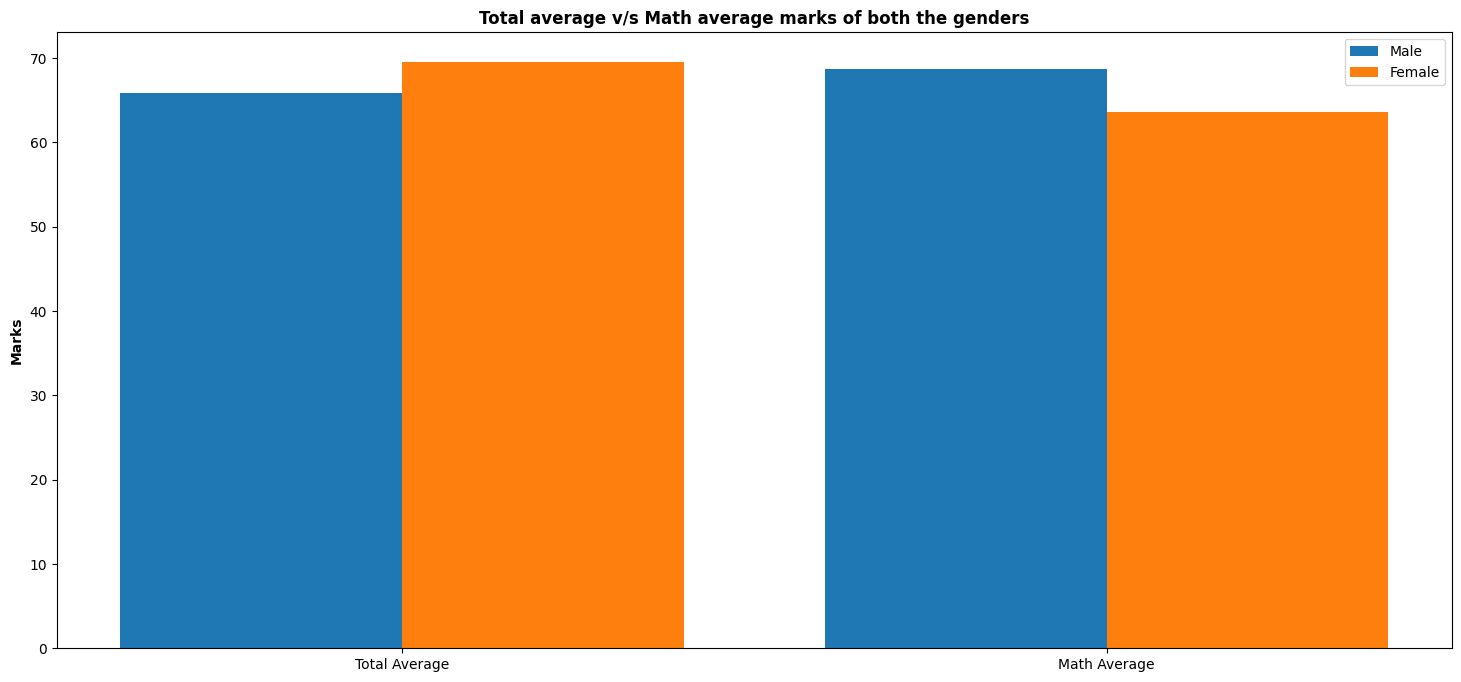

In [ ]:
plt.figure(figsize=[18,8])

X = ['Total Average', 'Math Average']

female_scores = [gender_group['Average'][0], gender_group['math score'][0]]
male_scores = [gender_group['Average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel('Marks',weight='bold')
plt.title('Total average v/s Math average marks of both the genders', weight='bold')
plt.legend()
plt.show()

### Insights

- On an average females have a better overall score than men.
- Whereas males have scored higher in Maths.

## RACE/ETHNICITY COLUMN

### How is Group Wise distribution?

- Is Race/Ethnicity has any impact on students' performance?
- UNIVARIATE ANALYSIS [How is Group wise distribution ?]

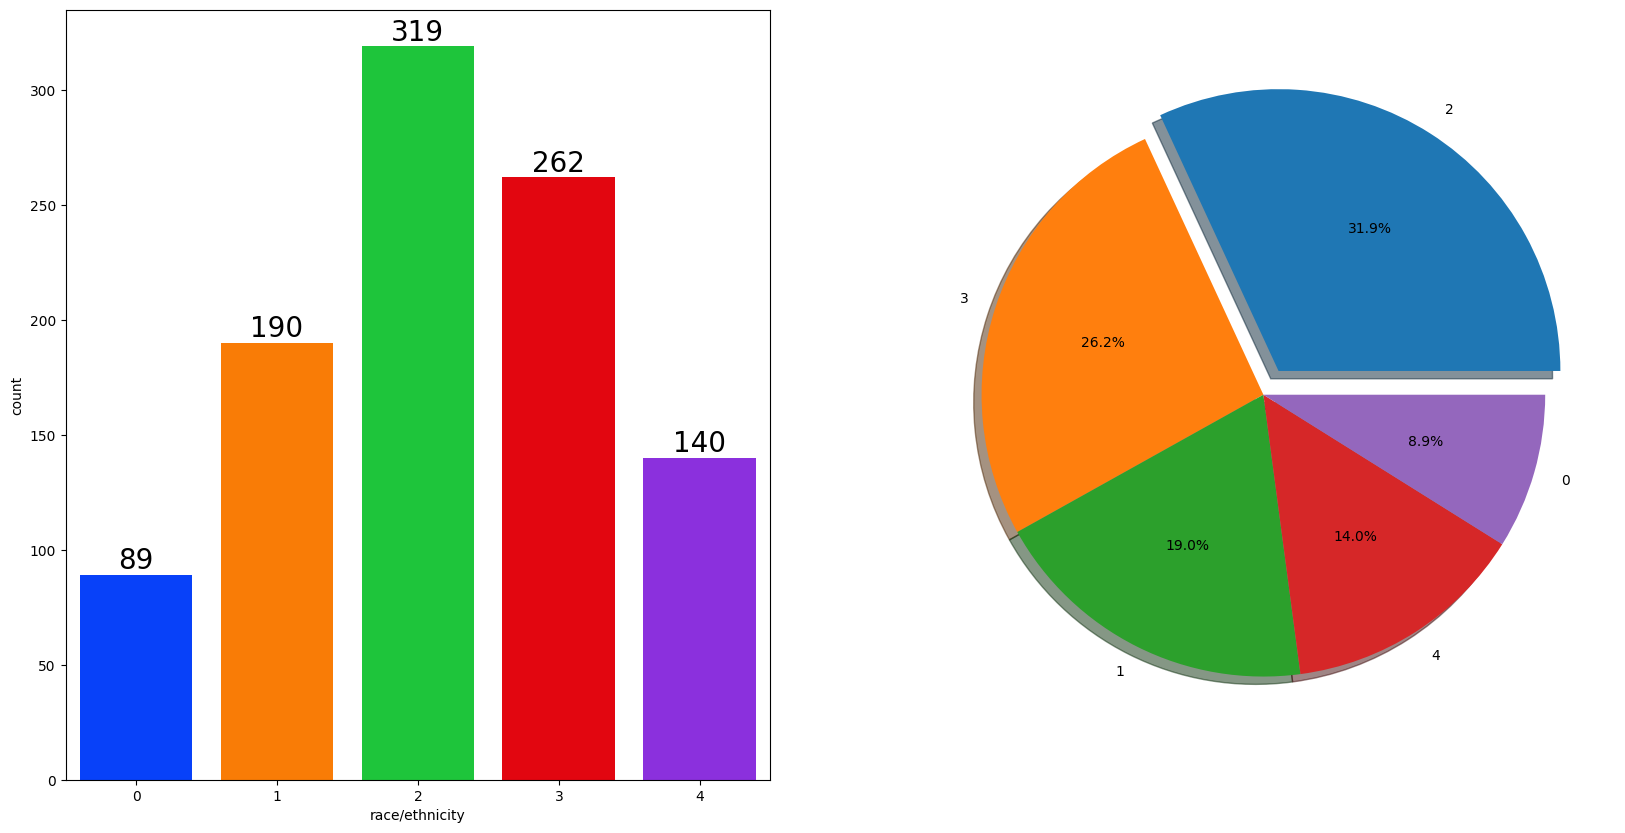

In [ ]:
f, ax = plt.subplots(1, 2, figsize=[20,10])
sns.countplot(x=df['race/ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index, explode=(0.1,0,0,0,0), autopct='%1.1f%%', shadow=True)
plt.show()

### Insights
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

### BIVARIATE ANALYSIS (Is Race/Ethnicity) has any impact on student's performance?

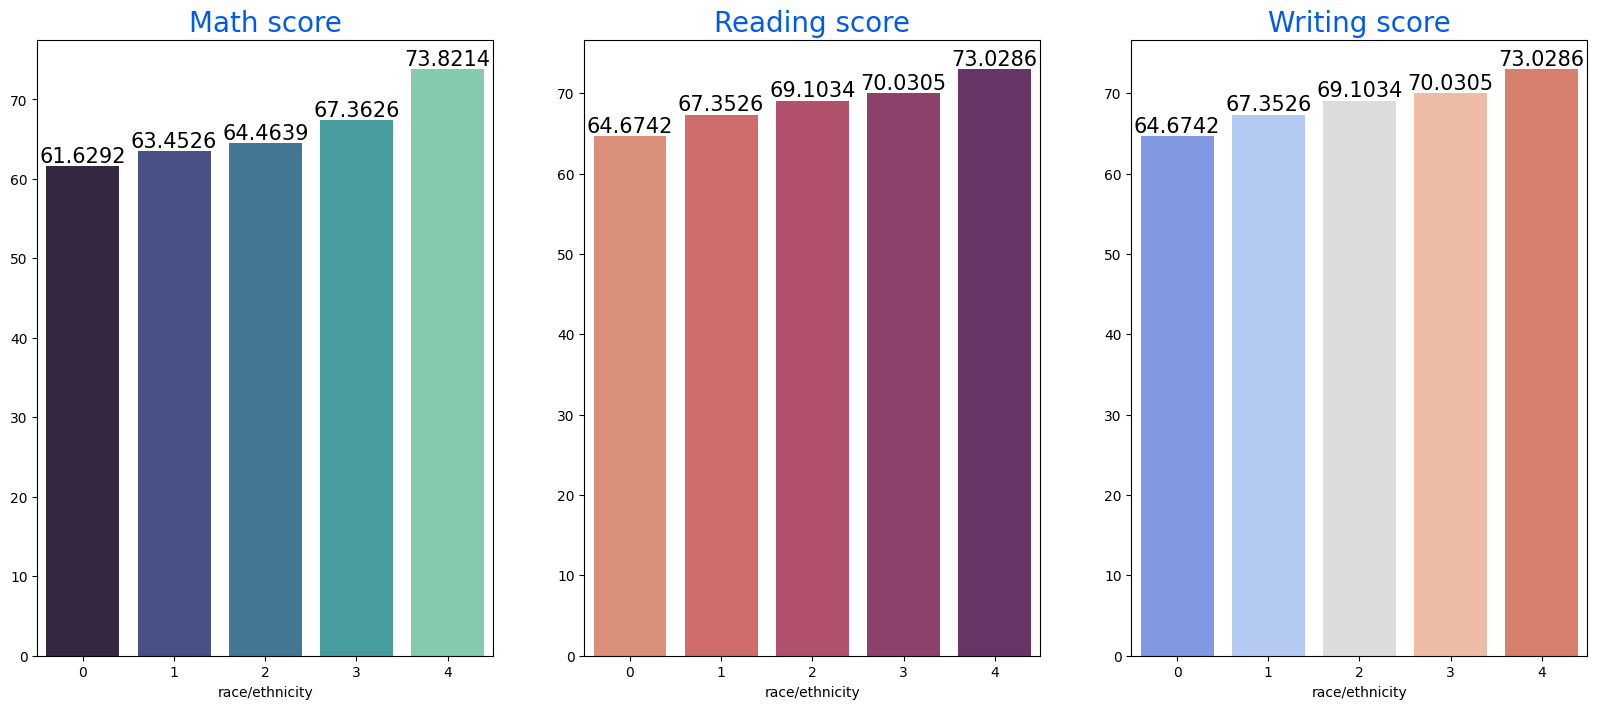

In [ ]:
Group_data2=df.groupby('race/ethnicity')
f, ax = plt.subplots(1, 3, figsize=[20, 8])
sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)


sns.barplot(x=Group_data2['reading score'].mean().index, y=Group_data2['reading score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)


sns.barplot(x=Group_data2['writing score'].mean().index, y=Group_data2['reading score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

### Insights

- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

## PARENTAL LEVEL OF EDUCATION COLUMN

- What is educational background of student's parent ?

- Is parental education has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

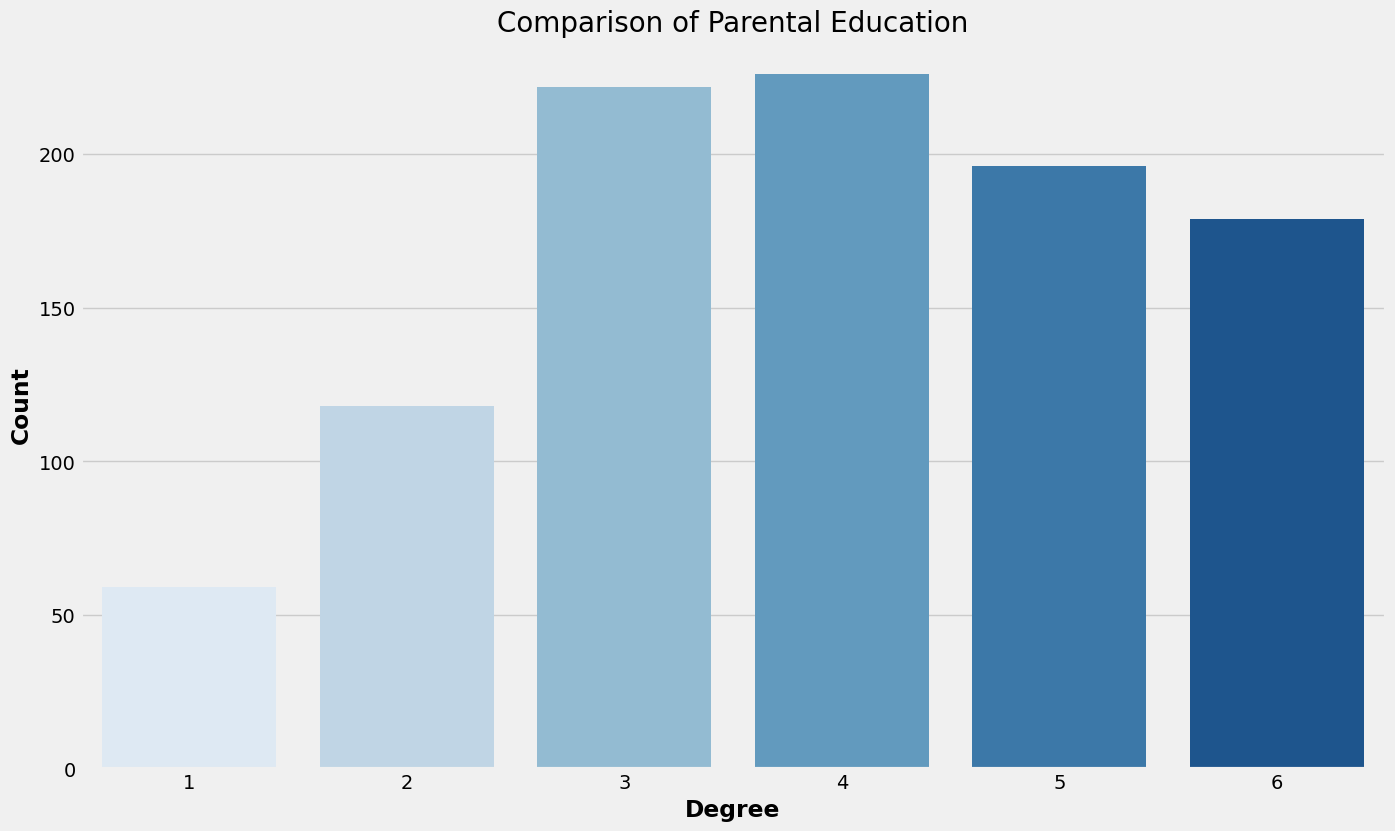

In [ ]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental level of education'], palette='Blues')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree', weight='bold')
plt.ylabel('Count', weight='bold')
plt.show()

### Insights

- Largest number of people are from college.

<Axes: >

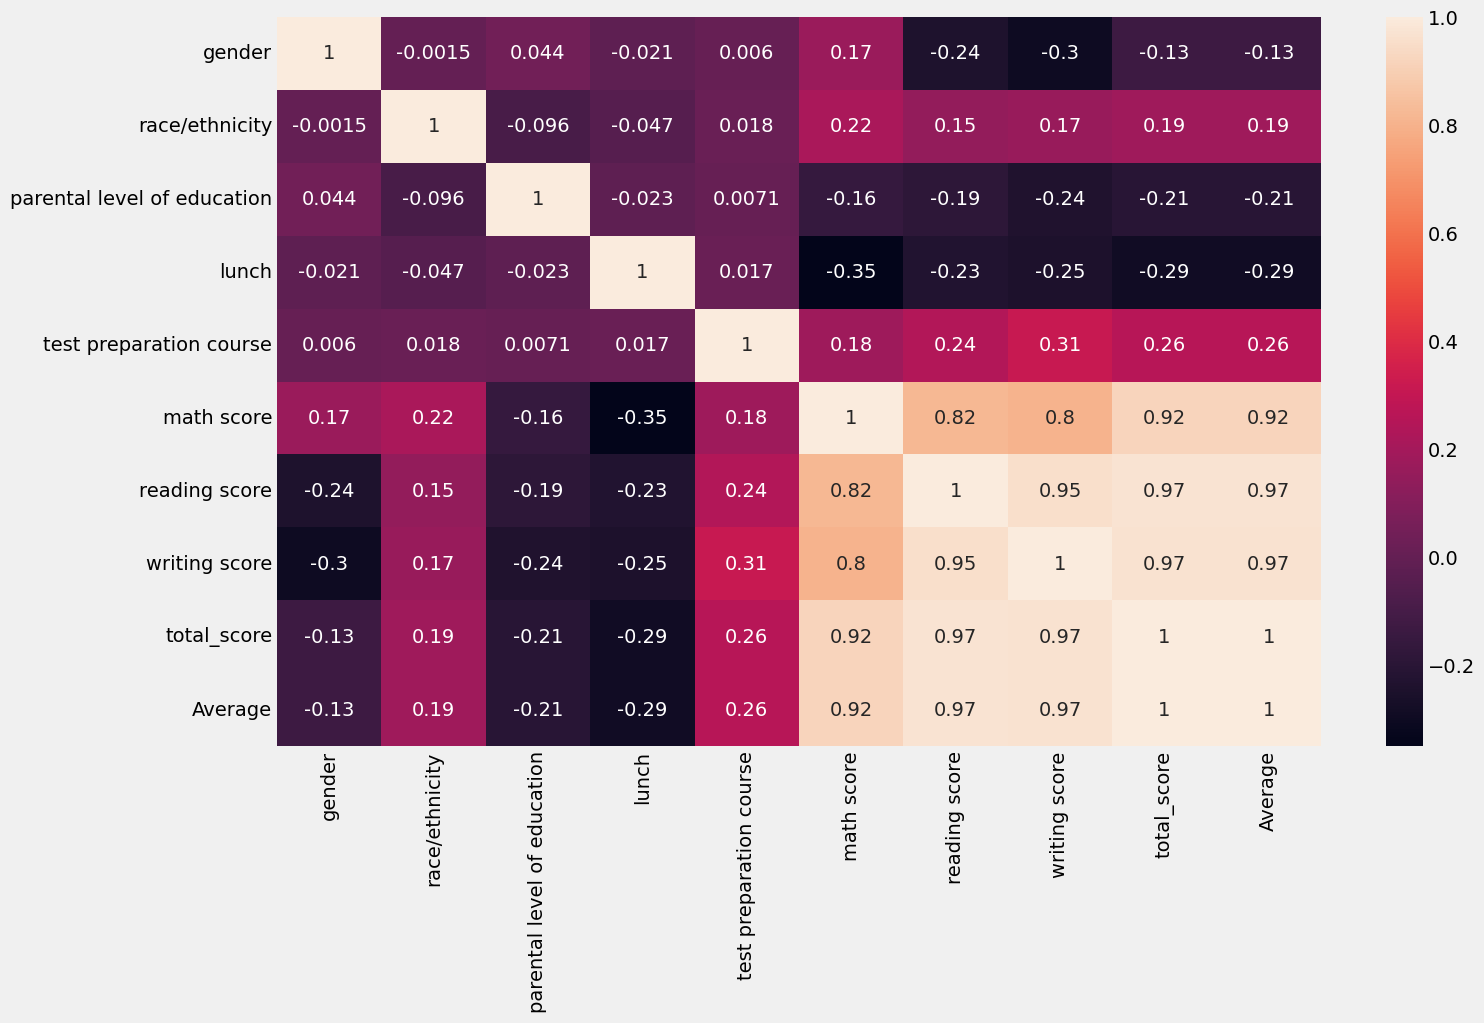

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Average
0,0,1,2,0,0,72,72,74,218,72.666667


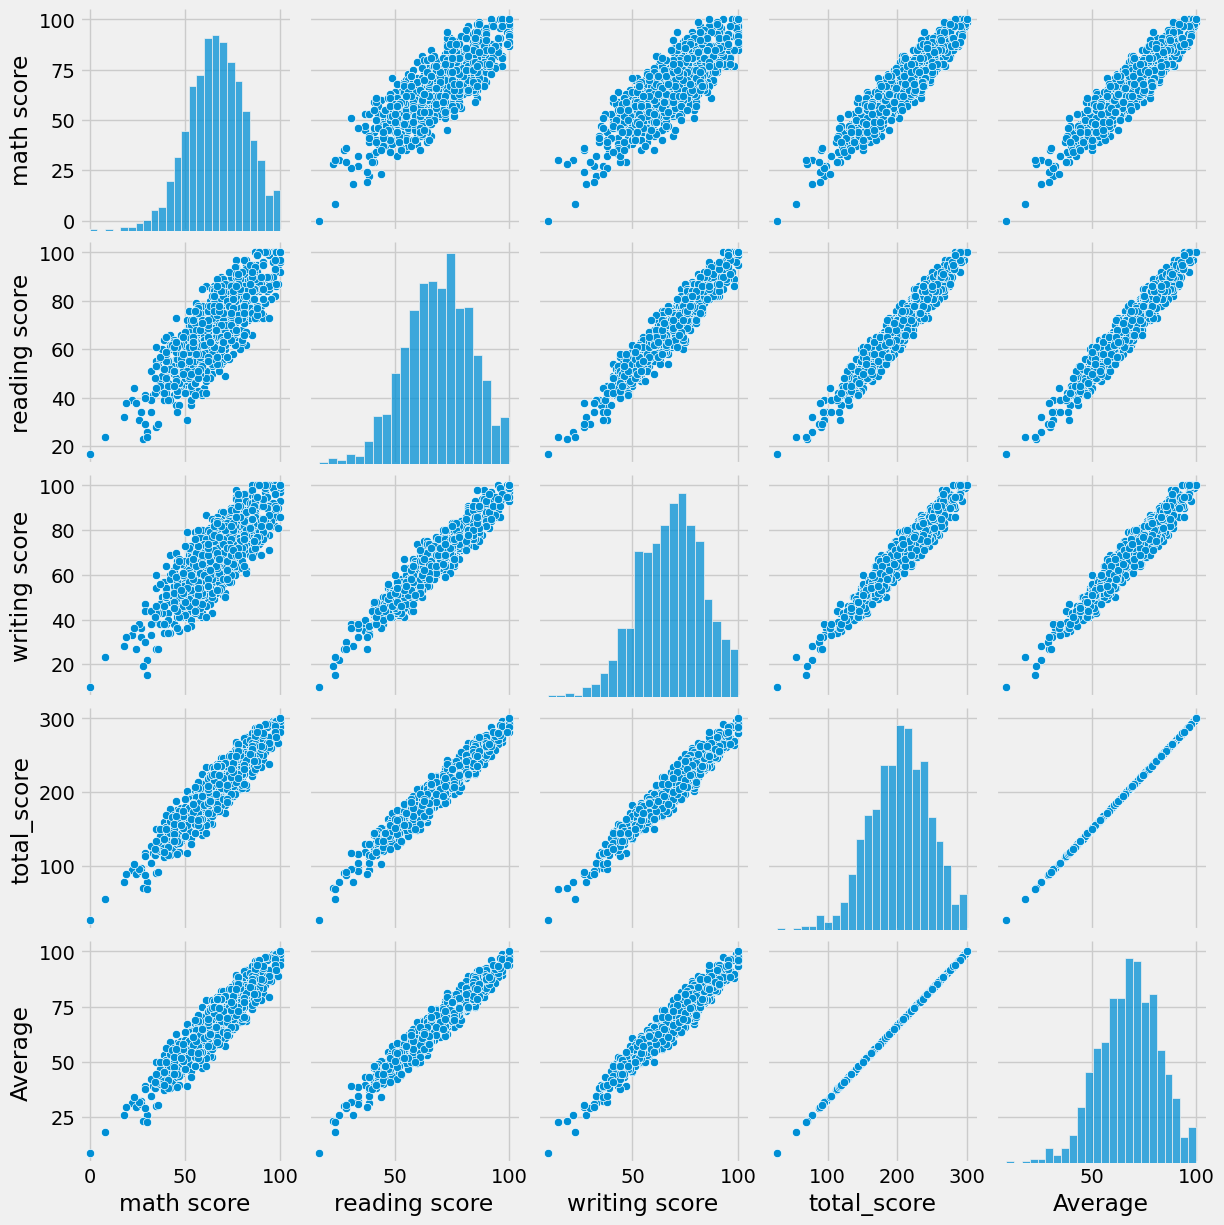

In [ ]:
sns.pairplot(df.iloc[:,-5:])

### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

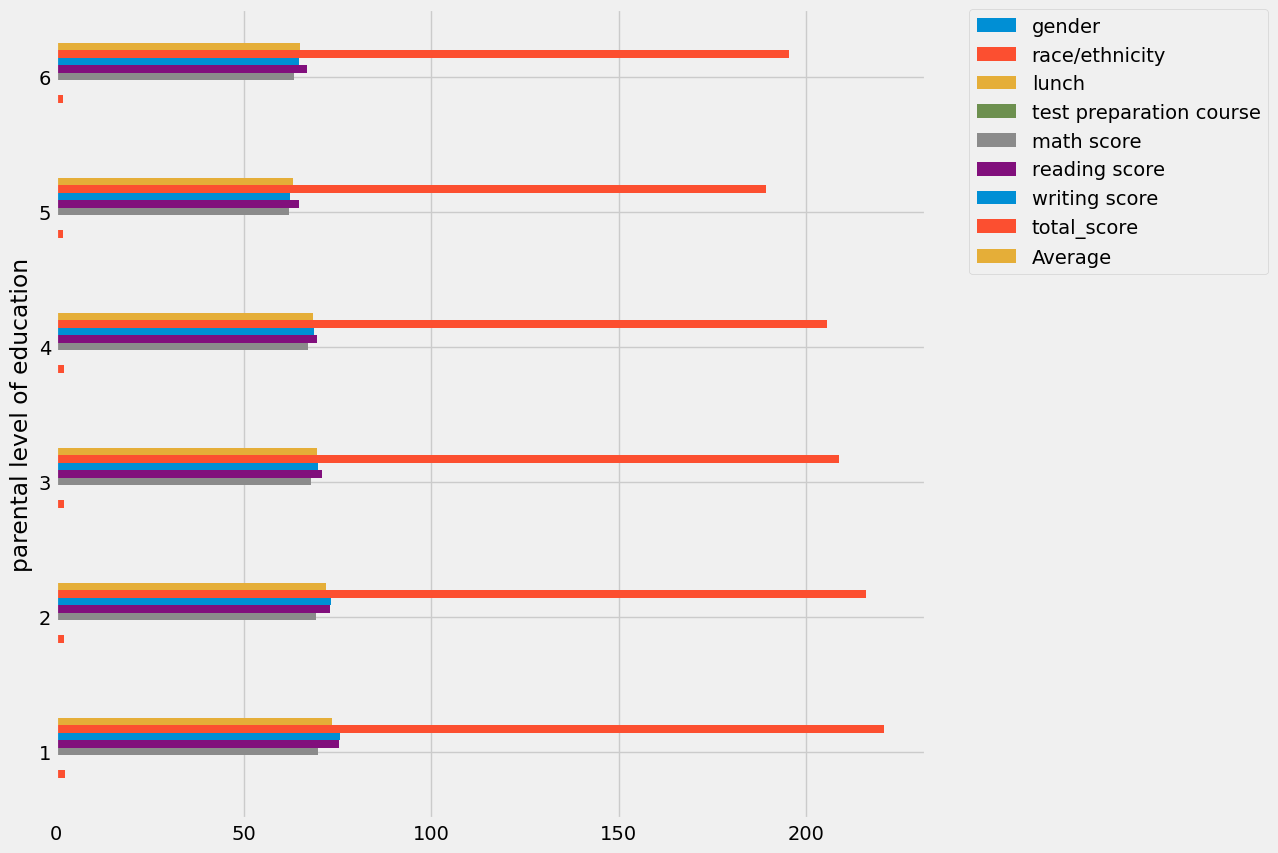

In [ ]:
df.groupby('parental level of education').agg('mean').plot(kind='barh', figsize=[10,10])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Insights

- The score of students whose parents possess master and bachelor level of education are higher than others.

## LUNCH COLUMN

- Which type of lunch is most common amoung students ?

- What is the effect of lunch type on test results?

### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

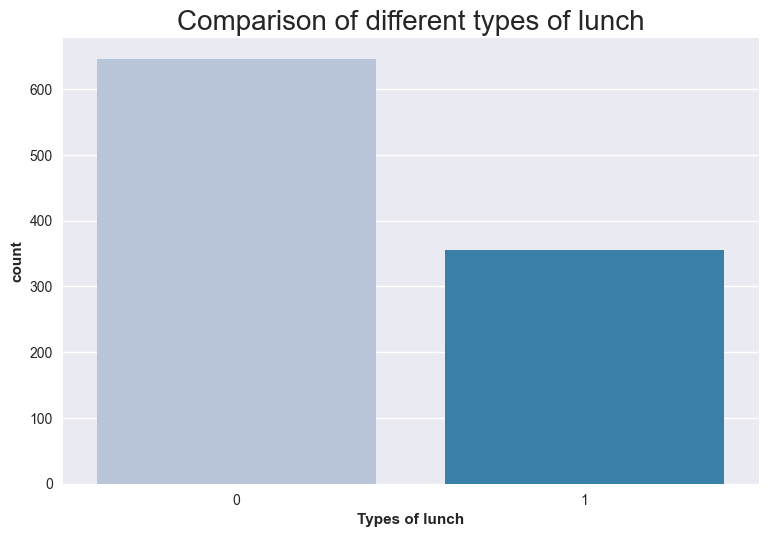

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8')
sns.countplot(data=df, x=df['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of lunch', weight='bold')
plt.ylabel('count',weight='bold')
plt.show()

### Insights
- Students being served Standard lunch was more than free lunch

### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

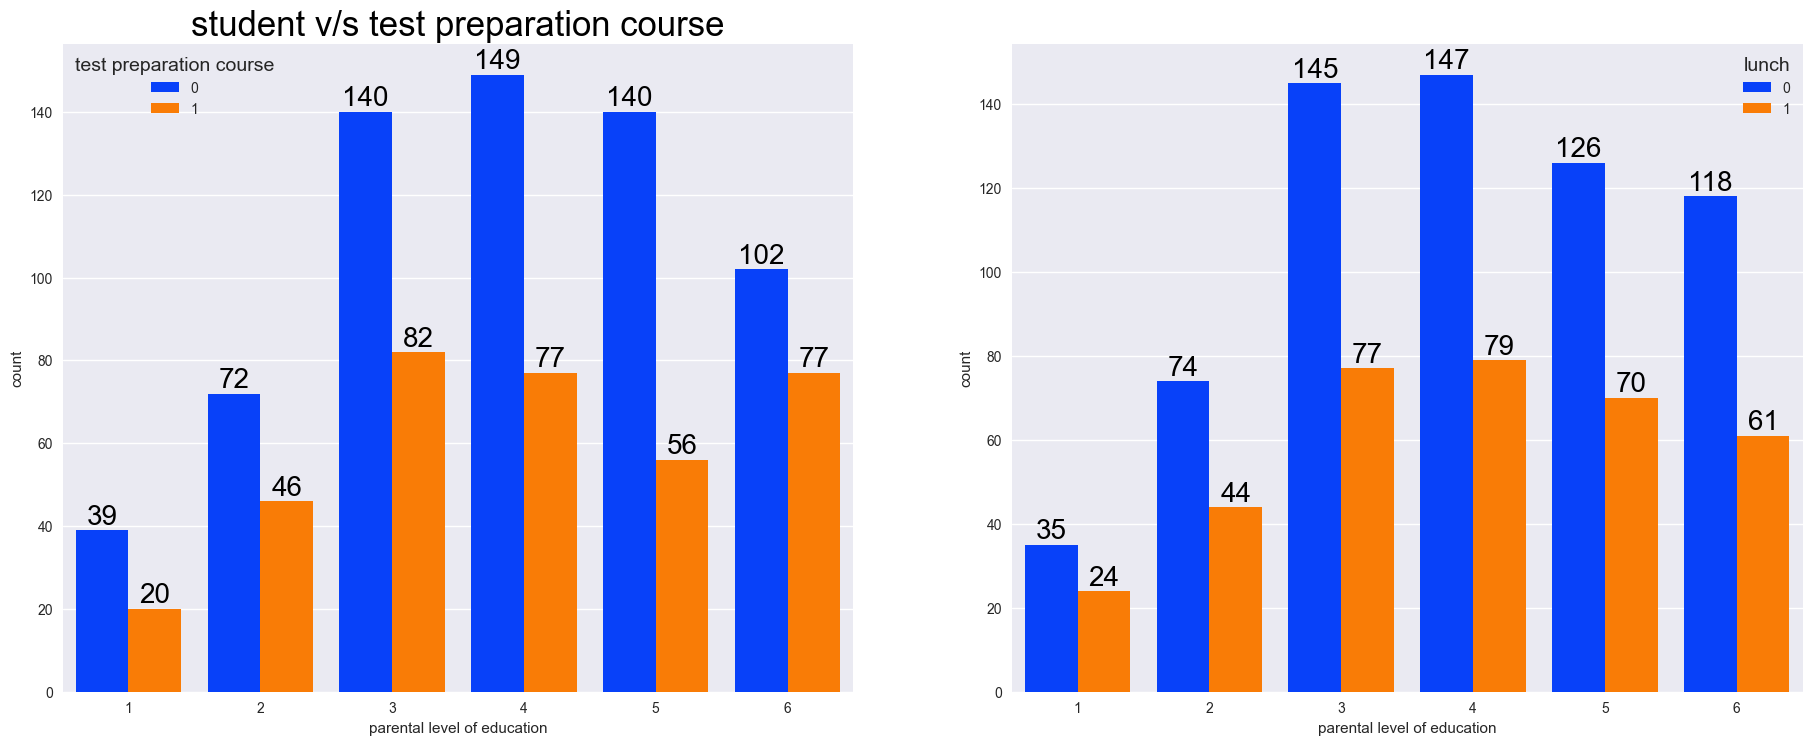

In [ ]:
f, ax =plt.subplots(1, 2, figsize=[20,8])
sns.countplot(x=df['parental level of education'], data=df, palette='bright', hue='test preparation course', saturation=0.95, ax=ax[0])
ax[0].set_title('student v/s test preparation course', color='black', size=25)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

sns.countplot(x=df['parental level of education'], data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

### Insights

- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

## TEST PREPARATION COURSE COLUMN

- Which type of lunch is most common amoung students ?

- Is Test prepration course has any impact on student's performance ?

### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

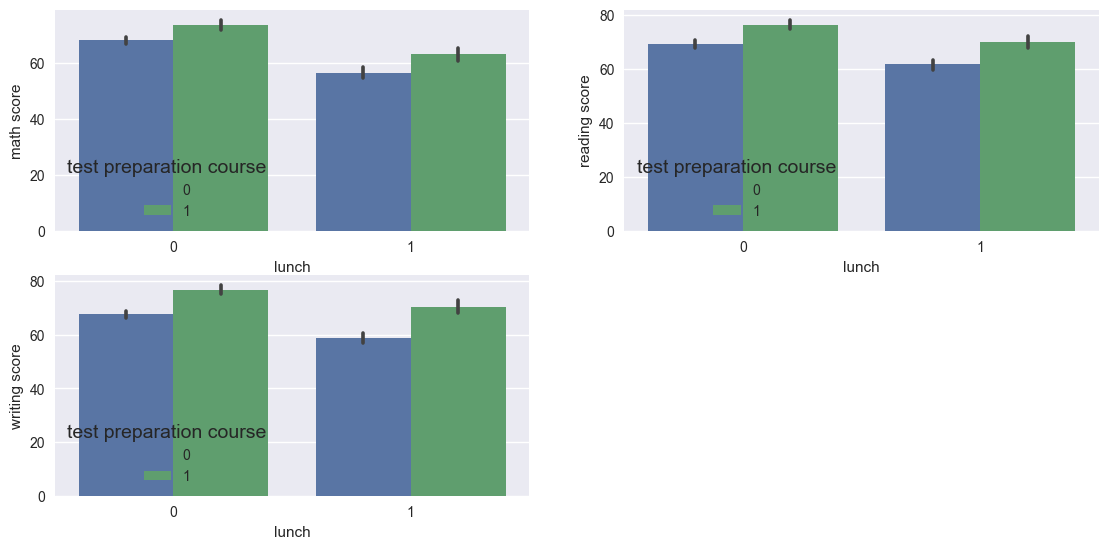

In [ ]:
plt.figure(figsize=[12,6])
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])
plt.show()

### Insights

- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course.

### Checking OUTLIERS

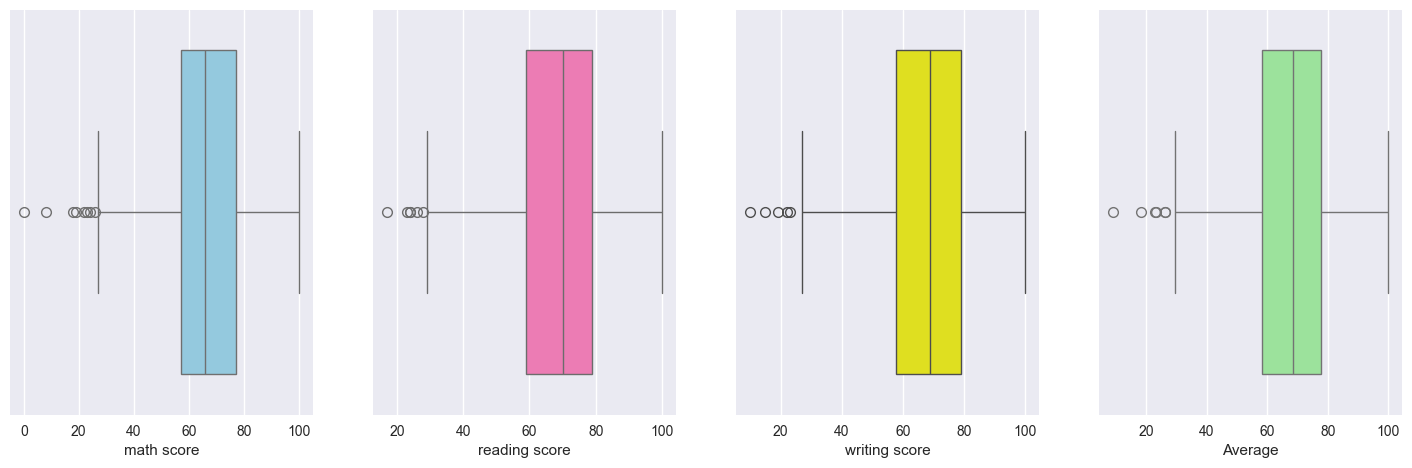

In [ ]:
plt.subplots(1, 4, figsize=(16, 5))
plt.subplot(1,4,1)
sns.boxplot(x=df['math score'], color='skyblue')
plt.subplot(1,4,2)
sns.boxplot(x=df['reading score'], color='hotpink')
plt.subplot(1,4,3)
sns.boxplot(x=df['writing score'], color='yellow')
plt.subplot(1,4,4)
sns.boxplot(x=df['Average'], color='lightgreen')
plt.show()

### MUTIVARIATE ANALYSIS USING PAIRPLOT

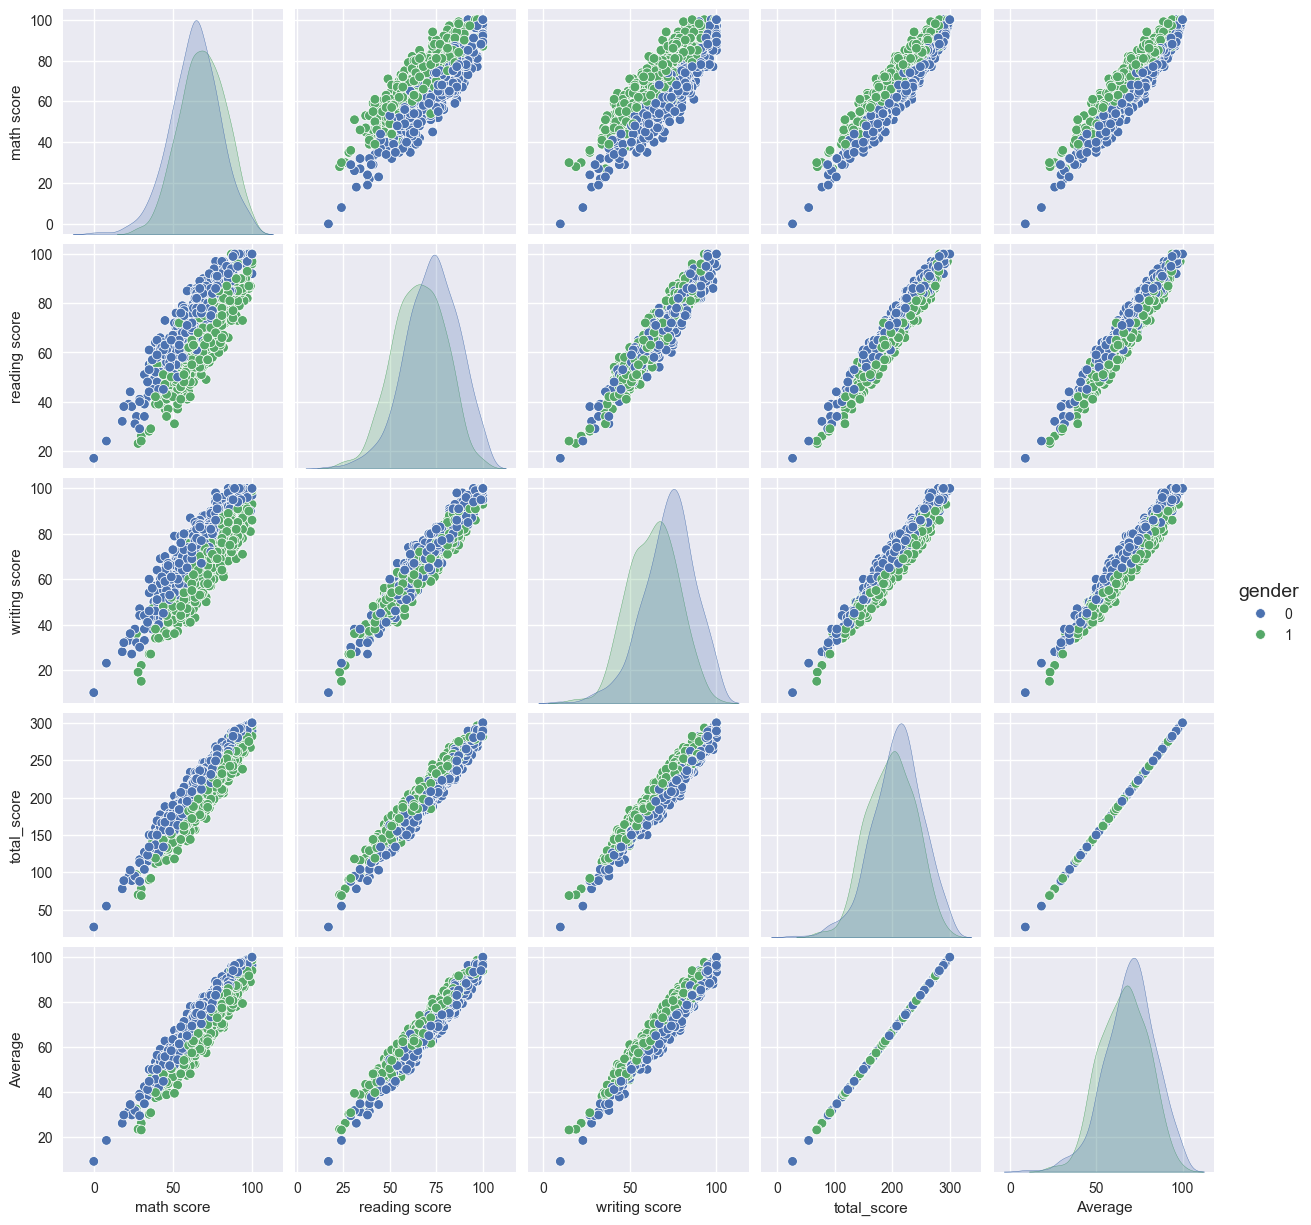

In [ ]:
sns.pairplot(df.iloc[:, [0] + list(range(-5, 0))], hue='gender')
plt.show()

### Insights

- From the above plot it is clear that all the scores increase linearly with each other.

## Conclusions

- Student's Performance is related with lunch, race, parental level education

- Females lead in pass percentage and also are top-scorers

- Student's Performance is not much related with test preparation course

- Finishing preparation course is benefitial